In [90]:
%matplotlib inline
import scipy
import sympy
import numpy as np
import matplotlib.pyplot as plt
from modsim import*

condition = Condition(R = 51,
                      L = 4,
                      C0 = 220 * (10 ** (-3)), 
                      V0 = 5,
                      dV0dt = 0,
                      f0 = 1073.02, 
                      w0 = 1)

# Do research of temp dependance of L and C

In [91]:
duration = 120

dt = 1

ts = linrange(0, duration, dt)

In [92]:
def make_system(condition):
    
    unpack(condition)
    
    init = State(X1 = V0, X2 = dV0dt)
    
    system = System(init=init, R=R, L=L, C0=C0, V0=V0, dV0dt=dV0dt, f0=f0, w0=w0, ts=ts)
    
    return system
                    
    
circuit = make_system(condition)

In [93]:
def slope_func(state, t, circuit):
    
    X1, X2 = state
    unpack(circuit)
    
    dX1dt = X2
    # dX2dt = ((L/R*C0) * (V0*np.degrees(np.sin(w0*t))) - ((1/R*L*C0)*X1) - ((1/L)*X2))
    # Used w0 in radians to get better results
    dX2dt = ((L/R*C0) * (V0*np.sin((w0)*t)) - ((1/R*L*C0)*X1) - ((1/L)*X2)) 
    
    return dX1dt, dX2dt

slope_func(circuit.init, 0, circuit)

(0.0, -0.086274509803921567)

In [94]:
run_odeint(circuit, slope_func)

# circuit.results

In [109]:
X1 = circuit.results.X1 # voltage
X2 = circuit.results.X2 # first derivative
X3 = (X2.diff()/dt) # second derivative

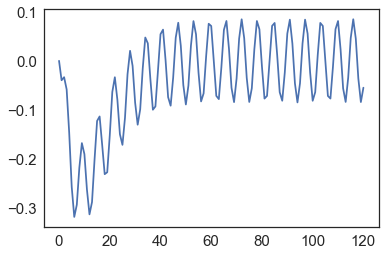

In [96]:
plt.plot(ts, X2)

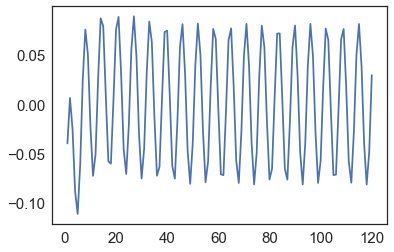

In [97]:
plt.plot(ts, X3)

In [114]:
def getAmp(X3, ts):
    
    min = 10000
    max = -5
    
    for i in range(len(X3)):
        
        t = ts[i]
        x = X3[i]
        
        if t > 60 and t < 120:
            
            if x > max:
                max = x
            
            if x < min:
                min = x
                
    Amp = (max - min)
    
    return Amp    

In [115]:
getAmp(X3, ts)

0.16287243458836009

In [100]:
w0_array = linrange(1, 2, 10)

w0_frame = []

In [104]:
for w0 in w0_array:
    
    #condition = Condition(R = 51, L = 4, C0 = 220 * (10 ** (-3)), V0 = 5, dV0dt = 0, f0 = 1073.02, w0 = 1)
    condition.w0 = w0
    circuit = make_system(condition)
    slope_func(circuit.init, 0, circuit)
    run_odeint(circuit, slope_func)
    w0_frame.append(X3)
    
    circuit.results